In [2]:
from PulsarPhaseogram import *
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Image
import numpy as np

# Creating the PulsarAnalysis object and settings

In [5]:
h=PulsarAnalysis()

Setting the input file. If we use a LST1 DL2-file:

In [6]:
h.setLSTInputFile('./PulsarPhaseogram/Tutorial/example_files/dl2_sample.h5')

We need to set the phase limits of the background and the peaks (signal region). We can define one,two or three signal regions. 

In [7]:
h.setBackgroundLimits([0.52,0.87])
h.setPeaklimits(P1_limits=[0,0.026,0.983,1],P2_limits=[0.377,0.422],P3_limits=None)

We can also set the binning that we are going to use for the construction of the lightcurve:

In [8]:
h.setBinning(50,xmin=0,xmax=1)

Additional cuts in gammaness or arrival direction can be set:

- Gammaness_cut
- Alpha_cut
- Theta2_cut
- Zd_cut

In [9]:
h.setParamCuts(gammaness_cut=0.5,alpha_cut=15)

We can also define the time interval (in seconds) in which we update the statistics. For instance, if we set tint=3600, the statistics will be calculated every hour of accumulated time of observation.

In [10]:
h.setTimeInterval(tint=3600)

If we want to do the fitting to the peaks to a model we can define it as following:

Available models:

- Single gaussian ('gaussian')
- Double gausssian ('dgaussian')
- Assymetric doble gaussian ('asym_dgaussian')
- Double lorentzian ('lorentzian')

In [16]:
h.setFittingParams(model='lorentzian',binned=False)

We can also do the statistics in certain energy bins. To set this binning:

In [17]:
h.setEnergybinning(np.logspace(np.log10(0.05),np.log10(0.5), 4))

# Running

Once the settings are defined we can calculate the statistics/fitting by running:

In [15]:
h.run()

/fefs/home/alvaro.mas/Pulsar_analysis/Notebooks/PulsarPhaseogram/pfitting.py:139: RuntimeWarning: invalid value encountered in sqrt
  self.errors=np.sqrt(np.diag(pcov_l))


No energy binning provided


# Show the results

## Overall results

We can show the lightcurve with the general results of the analysis. 

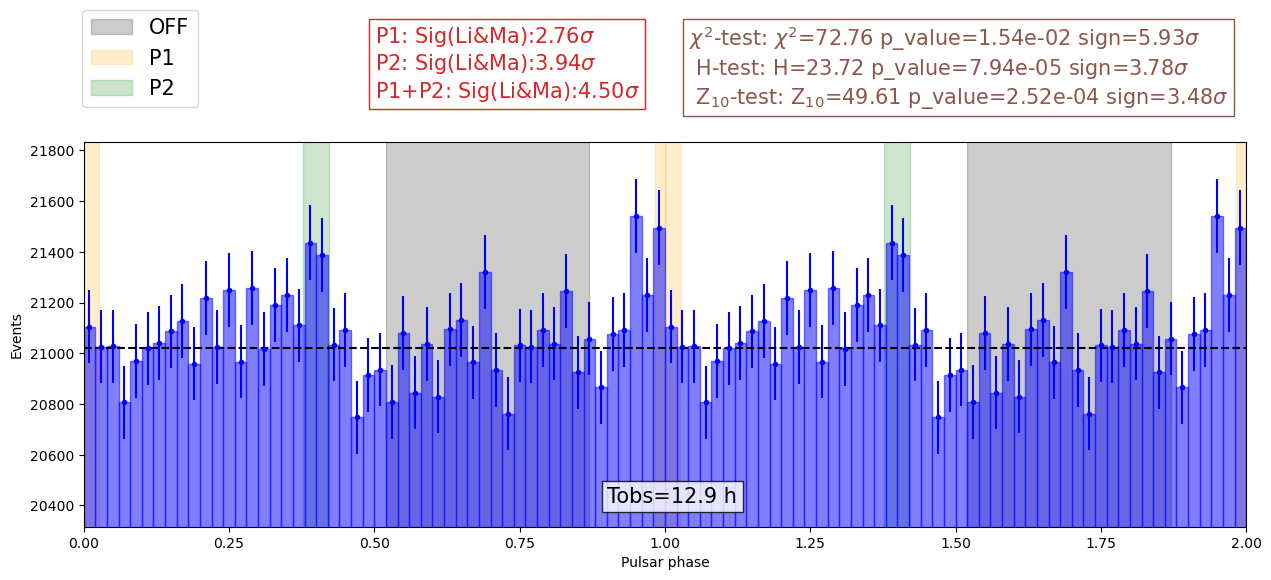

In [11]:
h.draw_phaseogram(phase_limits=[0,2],colorhist='blue')

And show the overall results in detail:

In [12]:
h.show_Presults()

RESULTS FOR THE PEAK STATISTICS:

                        P1            P2         P1+P2
Significance      2.759776      3.941109      4.503009
Nex             623.197143    913.671429   1536.868571
Nex_error       226.620895    232.975135    342.422077
Number        45806.000000  48198.000000  94004.000000
noff          45182.802857  47284.328571  92467.131429
sign_t_ratio      0.735693      1.050609      1.200398
s/n ratio         2.931831      4.201762      5.054091

P1/P2 ratio=0.68+/-0.30


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test    Zn_test     H_test
Statistic                 72.759458  49.608147  23.721684
p-value                    0.015396   0.000252   0.000079
Number of $\sigma$         5.927322   3.478676   3.776942


## Fit results

In [13]:
h.fit_model

'dgaussian'

In [14]:
h.show_fit_results()

      Name         Value  Error
0       mu    -30.062157    inf
1    sigma      1.273598    inf
2     mu_2 -11226.856342    inf
3  sigma_2      0.410924    inf
4        A    -31.858813    inf
5        B     13.449097    inf
6        C     18.408204    inf
7    Area1     42.935397    inf
8    Area2   1470.046053    inf


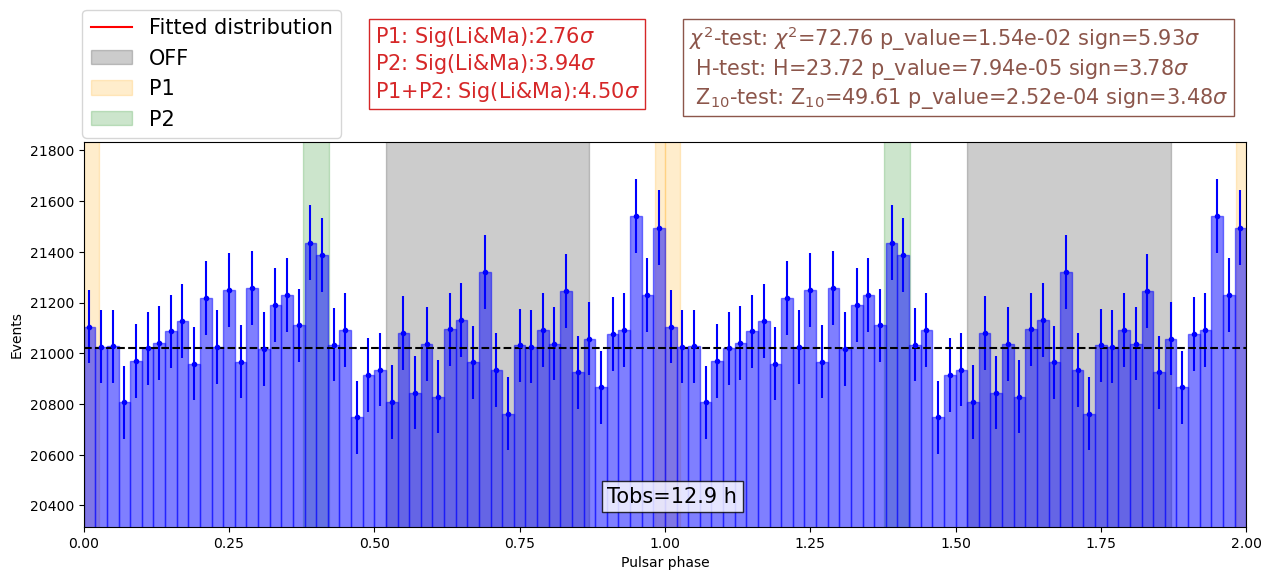

In [15]:
h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',fit=True)

## Results vs Time

In [14]:
h.show_timeEvolution()

AttributeError: 'PulsarAnalysis' object has no attribute 'TimeEv'

## Results vs Energy

In [13]:
h.show_lcVsEnergy()

AttributeError: 'PEnergyAnalysis' object has no attribute 'Parray'

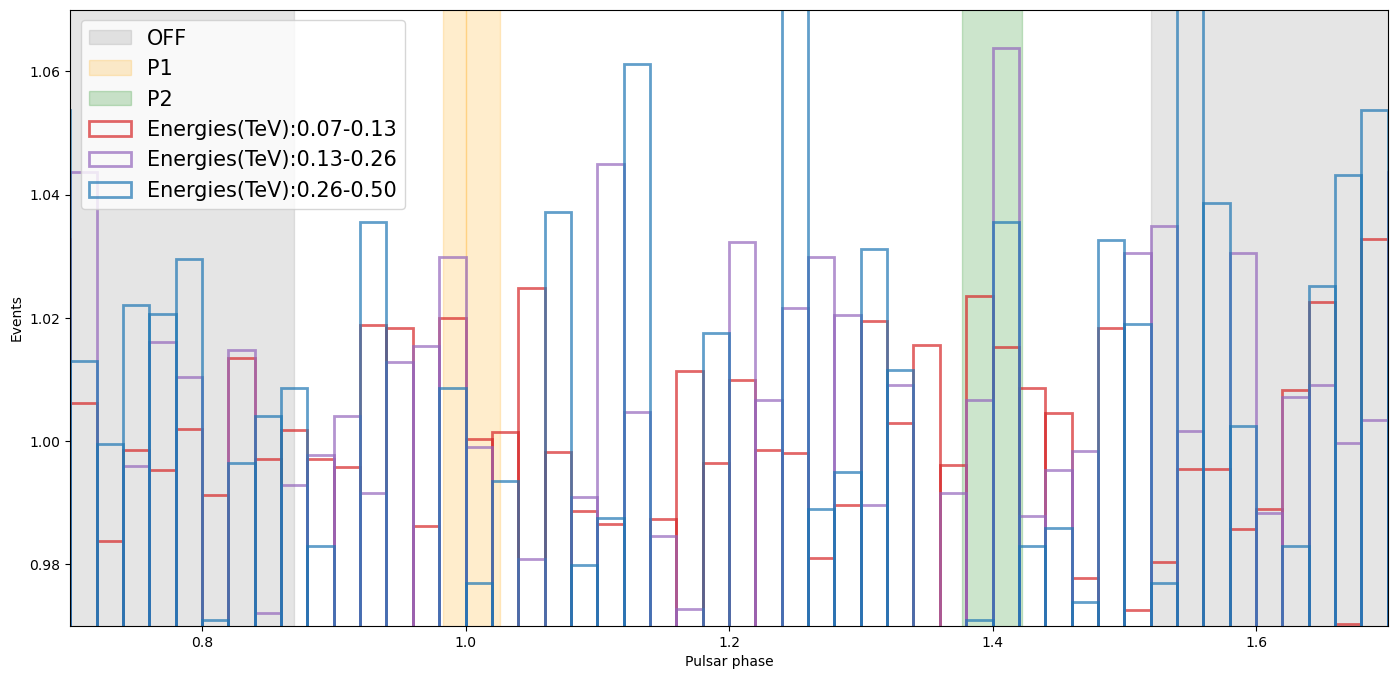

In [45]:
h.show_all_lc(ylimits=[0.97,1.07])

In [46]:
h.show_EnergyPresults()

ENERGY RANGE (TeV):0.07-0.13

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2         P1+P2
Significance     0.600324     2.127281      1.843228
Nex             61.120000   222.800000    283.920000
Nex_error      101.987140   105.352117    154.494152
Number        9270.000000  9860.000000  19130.000000
noff          9208.880000  9637.200000  18846.080000
sign_t_ratio     0.160446     0.568550      0.492632
s/n ratio        0.636913     2.269550      2.068166

P1/P2 ratio=0.27+/-0.48


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test    Zn_test    H_test
Statistic                 47.608873  21.883940  0.163719
p-value                    0.529618   0.346841  0.936918
Number of $\sigma$         5.316257   0.393862 -1.529401

 

-------------------------------------------------------------------
ENERGY RANGE (TeV):0.13-0.26

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2        P1+P2
Significance     0.401751     

/home/alvaro.mas/miniconda3/envs/lst-dev/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


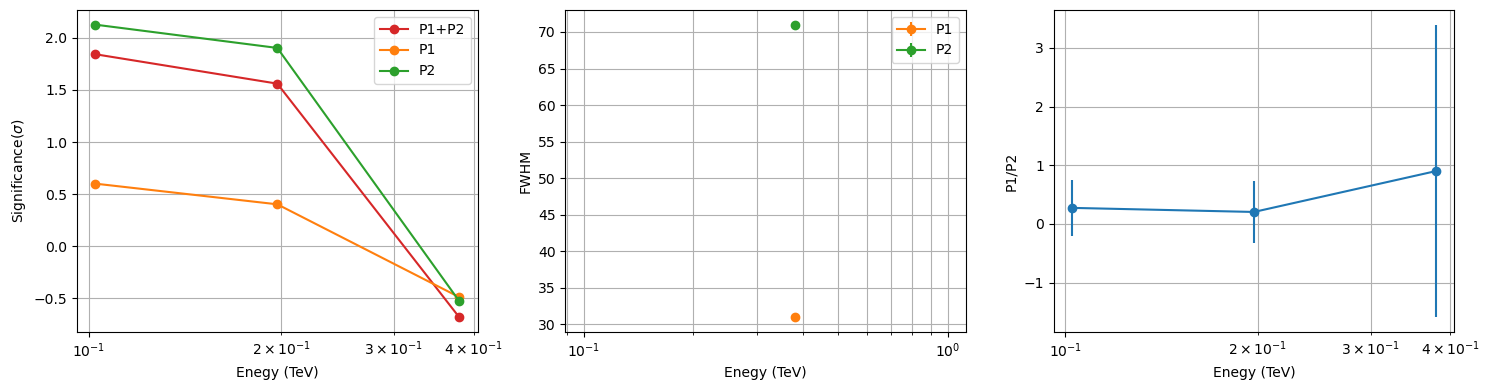

In [47]:
h.show_EnergyAna()

## Fit vs Energy

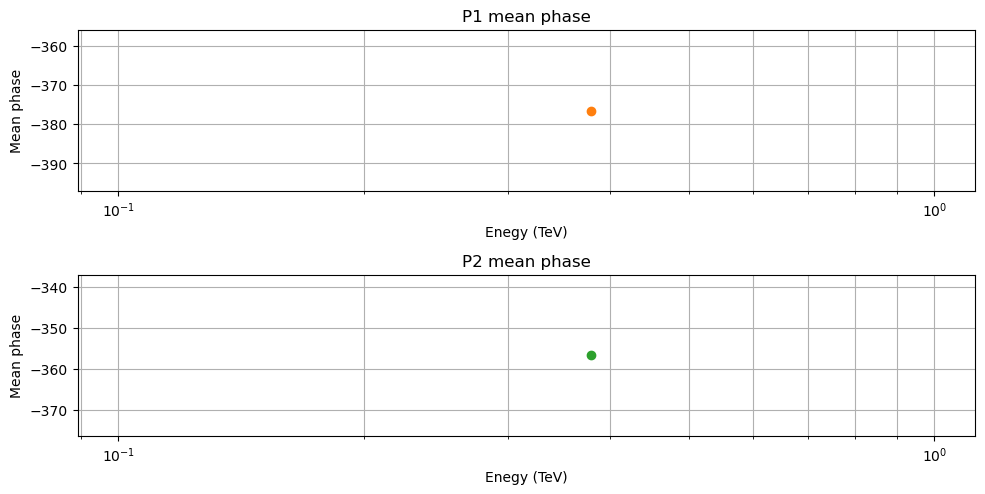

In [48]:
h.show_meanVsEnergy()

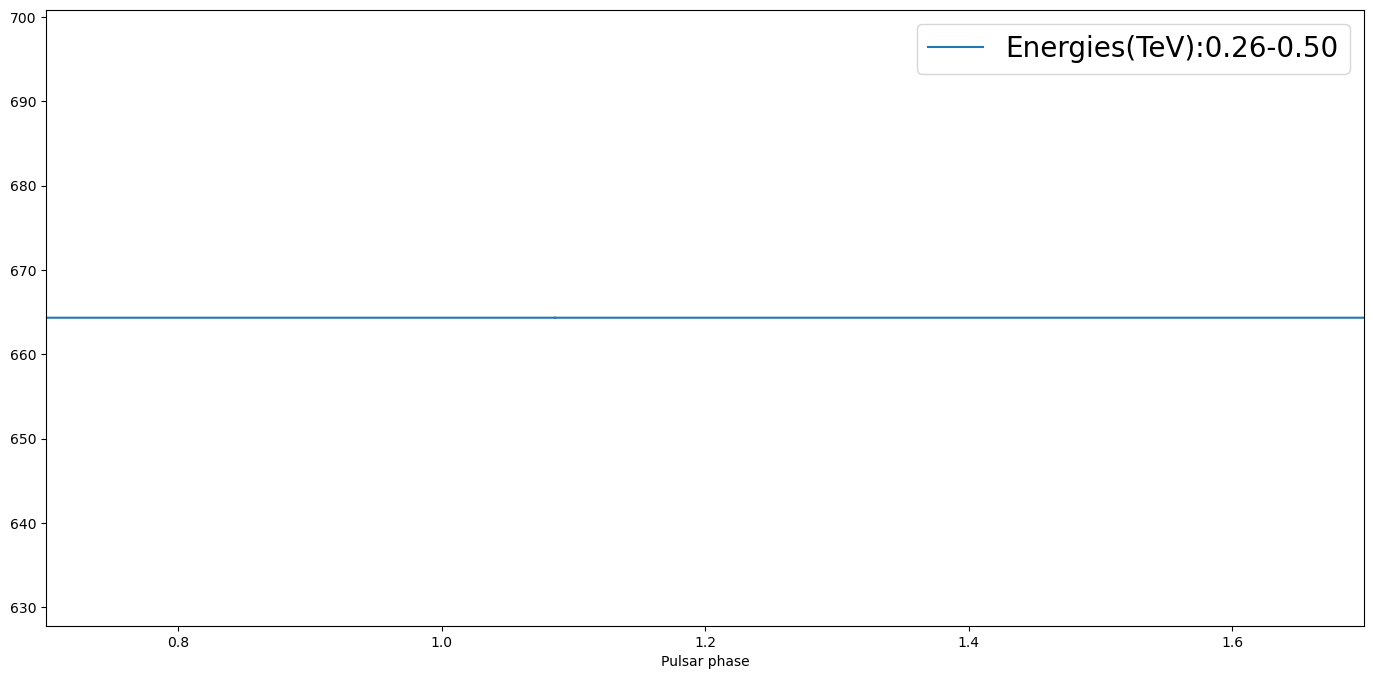

In [49]:
h.show_all_fits()